## Import needed libraries

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

%matplotlib

Using matplotlib backend: QtAgg


## Load datafrom file

In [2]:
liver_df = pd.read_csv('Liver_disease_data.csv')
liver_df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


Upon loading the data and displaying the first few rows on the dataset, we can see the features and predictors. See below on what each variables represents.

- Age: Range: 20 to 80 years.
- Gender: Male (0) or Female (1).
- BMI (Body Mass Index): Range: 15 to 40.
- Alcohol Consumption: Range: 0 to 20 units per week.
- Smoking: No (0) or Yes (1).
- Genetic Risk: Low (0), Medium (1), High (2).
- Physical Activity: Range: 0 to 10 hours per week.
- Diabetes: No (0) or Yes (1).
- Hypertension: No (0) or Yes (1).
- Liver Function Test: Range: 20 to 100.
- Diagnosis: Binary indicator (0 or 1) of liver disease presence.

## Data Exploration  

### Initial Analysis

In [3]:
liver_df.shape

(1700, 11)

Using the .shapee method we can see the demensions of the dataset that helps us to better understand the size of the data, which in this case we have 1700 rows and 11 columns

In [4]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


With the .info() property, we can get a summary of the DataFrame, which includes the number of null entries in each columns, records data type and memory usage and it also help to identify any missing values. On our gcase, we do not have any missing values as each columns records 1700 non-null

In [5]:
liver_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1700.0,50.394118,17.641915,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1700.0,0.504118,0.500130,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,1700.0,27.699801,7.210400,15.004710,21.455414,27.925367,33.957668,39.992845
AlcoholConsumption,1700.0,9.832309,5.757472,0.003731,4.841811,9.828195,14.871671,19.952456
Smoking,1700.0,0.291765,0.454708,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1700.0,0.521765,0.666262,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1700.0,5.000993,2.847074,0.001852,2.622121,5.022883,7.401642,9.994964
Diabetes,1700.0,0.142353,0.349515,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,1700.0,0.154706,0.361730,0.000000,0.000000,0.000000,0.000000,1.000000
LiverFunctionTest,1700.0,59.863867,22.996262,20.019254,40.024216,59.513146,79.428755,99.991413


The .discribe() propery, enable us to get the statistical summary of the data which includes the means, standard deviation, minimumn and maximum values, the 25th, 50th, and 75th percentiles for all numberical values. We can see on this data that the minimum and maximumn age is 20 and 80 respectively. We have minimum alcohol comsumption between 0 to 20 times a week and minimum and maximum body mass index between 15 to 40

### Visualizations

In [6]:
crosstab_gd = pd.crosstab(liver_df['Gender'], liver_df['Diagnosis'])
crosstab_gd

Diagnosis,0,1
Gender,,
0,459,384
1,305,552


In [7]:
crosstab_sd = pd.crosstab(liver_df['Smoking'], liver_df['Diagnosis'])
crosstab_sd

Diagnosis,0,1
Smoking,,
0,618,586
1,146,350


In [8]:
crosstab_dd = pd.crosstab(liver_df['Diabetes'], liver_df['Diagnosis'])
crosstab_dd

Diagnosis,0,1
Diabetes,,
0,687,771
1,77,165


Using the crosstabbulation (contingency table) .crosstab property we can display the frequeny distribution of each features agaisnt the predict. This willl help us understand the relationship between two variables.
Here we can see the relationship between Diabetes and Diagnosis which explains the number of diabetes related liver issues and non liver issues. We see that 687 non diabetes has no liver issues compared to 771 with liver issues

## Data Cleaning 

## Data Cleaning 

In [9]:
liver_df.isnull().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

With the .isnull() and .sum(), we can return the missing (null) values False or True and with the .sum() property, we can sum those both boolen values. On our dataset, we can see that there are no missing (null) values, indicating that our data is clean

In [10]:
liver_df.dtypes

Age                     int64
Gender                  int64
BMI                   float64
AlcoholConsumption    float64
Smoking                 int64
GeneticRisk             int64
PhysicalActivity      float64
Diabetes                int64
Hypertension            int64
LiverFunctionTest     float64
Diagnosis               int64
dtype: object

The .dtypes an be used to return the data types of each columns in the dataset. and we can see the corresponding data types and coumns.

## Data Preprocessing 

### Feature Engineering

In [11]:
# Define age bins and labels
bins = [0, 18, 35, 50, 65, 80, np.inf]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']


# Create age range colum
liver_df['age_range'] = pd.cut(liver_df['Age'], bins=bins, labels=labels, right=True)

liver_df

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,age_range
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1,51-65
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1,66-80
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0,36-50
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1,19-35
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1,51-65
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1,36-50
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1,36-50
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1,36-50
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1,66-80


The Age column is our dataset was converted to age range using the bins and labels to create an age bracket for the age

In [13]:
# Drop unneccessary columns
X = liver_df.drop(['Age', 'Diagnosis'], axis=1)
y = liver_df['Diagnosis']

By using the X and y variable, we are able to create a new DataFrame where X contains all the features expect the Age columns, and y is the target also known as the predictor.

### Encoding Categorical Variables

In [16]:
# Label Encoding
label_encoders = {}
for column in ['age_range']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
    
label_encoders

{'age_range': LabelEncoder()}

In [17]:
X.head()

,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,age_range
0,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,2
1,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,3
2,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,1
3,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,0
4,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,2


In [18]:
# Apply MinMaxScaler
scaler = MinMaxScaler()

In [20]:
columns_to_scale = ['Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'age_range']

In [21]:
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X

,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,age_range
0,0.0,0.834511,0.865674,0.0,0.5,0.065754,0.0,0.0,0.284036,0.666667
1,1.0,0.629409,0.110159,0.0,0.5,0.166986,1.0,0.0,0.591338,1.000000
2,0.0,0.198762,0.927238,0.0,0.0,0.993330,0.0,0.0,0.546687,0.333333
3,1.0,0.064459,0.633080,0.0,0.0,0.563216,0.0,0.0,0.556902,0.000000
4,1.0,0.042465,0.054344,0.0,0.5,0.356682,1.0,0.0,0.723370,0.666667
...,...,...,...,...,...,...,...,...,...,...
1695,0.0,0.940190,0.720896,0.0,0.5,0.099112,0.0,0.0,0.974273,0.333333
1696,0.0,0.504055,0.272061,0.0,0.0,0.839442,0.0,0.0,0.628235,0.333333
1697,0.0,0.949463,0.316841,1.0,1.0,0.931879,0.0,1.0,0.450583,0.333333
1698,0.0,0.833039,0.846956,0.0,1.0,0.322482,0.0,0.0,0.078548,1.000000


In [22]:
y.value_counts()

Diagnosis
1    936
0    764
Name: count, dtype: int64

Here we created a label encoder for the age range for the purpose of converting categorucal labels into numerical format. Then we scale the features by using MinMaxScaler, and using the fit_transform method to fit and transform the data into a specific range. Then using the y.value_counts() to understand the distribution of the target values. It is a crucial action because it enable us to understand class imbalance, which we can see that the target and distributed fairly.

## Train | Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print('Training Cases:%d\n Test Cases: %d' %(X_train.shape[0], X_test.shape[0]))

Training Cases:1360
 Test Cases: 340


Upon split the data into training and test sets 80-20, we can see that we have 1360 of the data is 1360 while test set is 340

## Build And Train The Model

In [65]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [66]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale', probability=True)))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

In [67]:
# Evaluate each model in turn
results = []
names = []
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
metric_dict = {metric: [] for metric in scoring}

LR: Accuracy=0.8324 (Std=0.0270), Precision=0.8442 (Std=0.0236), Recall=0.8532 (Std=0.0397), F1=0.8481 (Std=0.0255), AUC-ROC=0.9044 (Std=0.0218)
KNN: Accuracy=0.8318 (Std=0.0332), Precision=0.8443 (Std=0.0371), Recall=0.8521 (Std=0.0378), F1=0.8477 (Std=0.0309), AUC-ROC=0.8902 (Std=0.0285)
NB: Accuracy=0.8047 (Std=0.0277), Precision=0.8286 (Std=0.0377), Recall=0.8144 (Std=0.0305), F1=0.8208 (Std=0.0264), AUC-ROC=0.8721 (Std=0.0317)
SVC: Accuracy=0.8482 (Std=0.0330), Precision=0.8516 (Std=0.0228), Recall=0.8775 (Std=0.0498), F1=0.8638 (Std=0.0311), AUC-ROC=0.9199 (Std=0.0234)
RFC: Accuracy=0.9071 (Std=0.0224), Precision=0.9194 (Std=0.0246), Recall=0.9028 (Std=0.0248), F1=0.9100 (Std=0.0186), AUC-ROC=0.9468 (Std=0.0144)
DTC: Accuracy=0.8524 (Std=0.0236), Precision=0.8743 (Std=0.0357), Recall=0.8644 (Std=0.0259), F1=0.8609 (Std=0.0262), AUC-ROC=0.8564 (Std=0.0276)
XGB: Accuracy=0.8994 (Std=0.0179), Precision=0.9078 (Std=0.0338), Recall=0.9105 (Std=0.0285), F1=0.9084 (Std=0.0182), AUC-ROC=

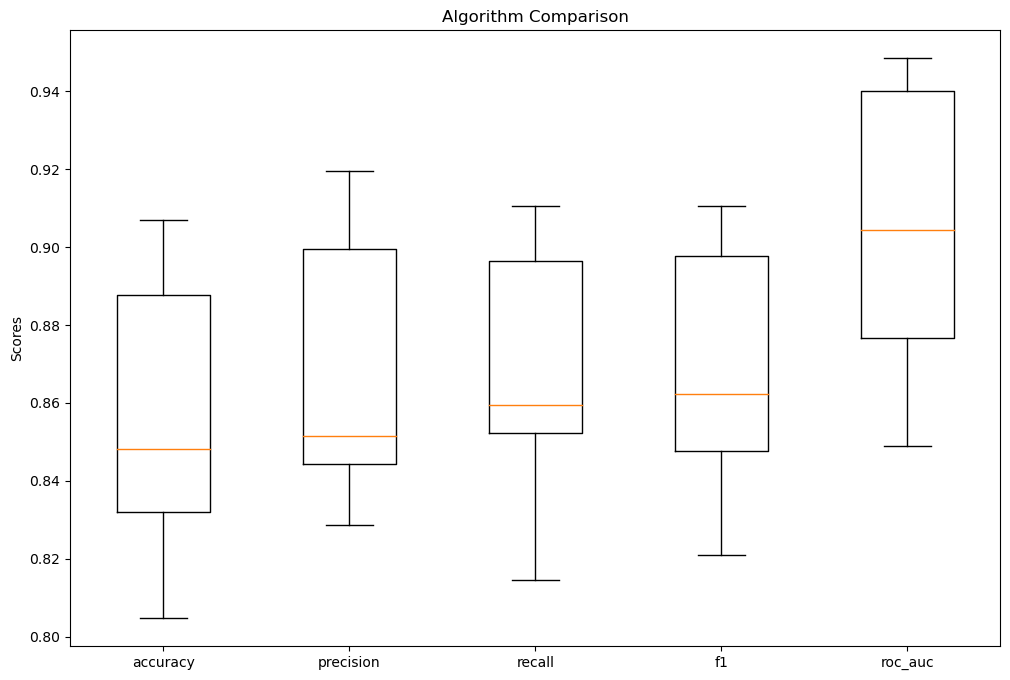

In [69]:
%matplotlib inline

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = {metric: cross_val_score(model, X, y, cv=kfold, scoring=metric) for metric in scoring}
    for metric in scoring:
        metric_dict[metric].append(cv_results[metric].mean())
    names.append(name)
    message = "{}: Accuracy={:.4f} (Std={:.4f}), Precision={:.4f} (Std={:.4f}), Recall={:.4f} (Std={:.4f}), F1={:.4f} (Std={:.4f}), AUC-ROC={:.4f} (Std={:.4f})".format(
        name,
        cv_results['accuracy'].mean(), cv_results['accuracy'].std(),
        cv_results['precision'].mean(), cv_results['precision'].std(),
        cv_results['recall'].mean(), cv_results['recall'].std(),
        cv_results['f1'].mean(), cv_results['f1'].std(),
        cv_results['roc_auc'].mean(), cv_results['roc_auc'].std()
    )
    print(message)

# Boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([metric_dict[metric] for metric in scoring], labels=scoring)
plt.title('Algorithm Comparison')
plt.ylabel('Scores')
plt.show()

Upon running the model comparison we can see that the rfc is the top performer in terms of accuracy, precision and F1 scores, whcih indicates an excellent overall performance. It also exibits a high AUC-ROC provig to be a very good class distinction ability. So we will be going with Random Forest Classifier.

In [70]:
# Initialize and train the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

Initialization the Random Forest Classifier with an object of 100 trees (estimators)

In [71]:
# Make Prediction
predictions = rfc.predict(X_test)

Accuracy:  0.9
Classidication Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       162
           1       0.88      0.94      0.91       178

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340



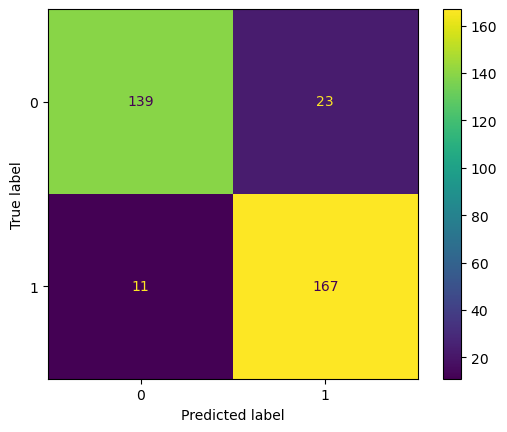

In [72]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: ', accuracy)b
print('Classidication Report:\n', classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

The confusion matrics which is a table used to describe the performance of a classification model, is crucial in comparing the actual vs. predicted values. 
we can see that the model predicted 139 case correct for no liver issues but got 23 wrong. At the same time, got 167 case correct for having liver issues, but got 11 wrong.
These are refered to the true positive, true nagative, false positive and false negative.

## Important Features

              Feature  Importance
2  AlcoholConsumption    0.257645
8   LiverFunctionTest    0.244565
1                 BMI    0.118971
5    PhysicalActivity    0.113413
9           age_range    0.067801
4         GeneticRisk    0.052679
0              Gender    0.046175
3             Smoking    0.046012
7        Hypertension    0.032542
6            Diabetes    0.020196


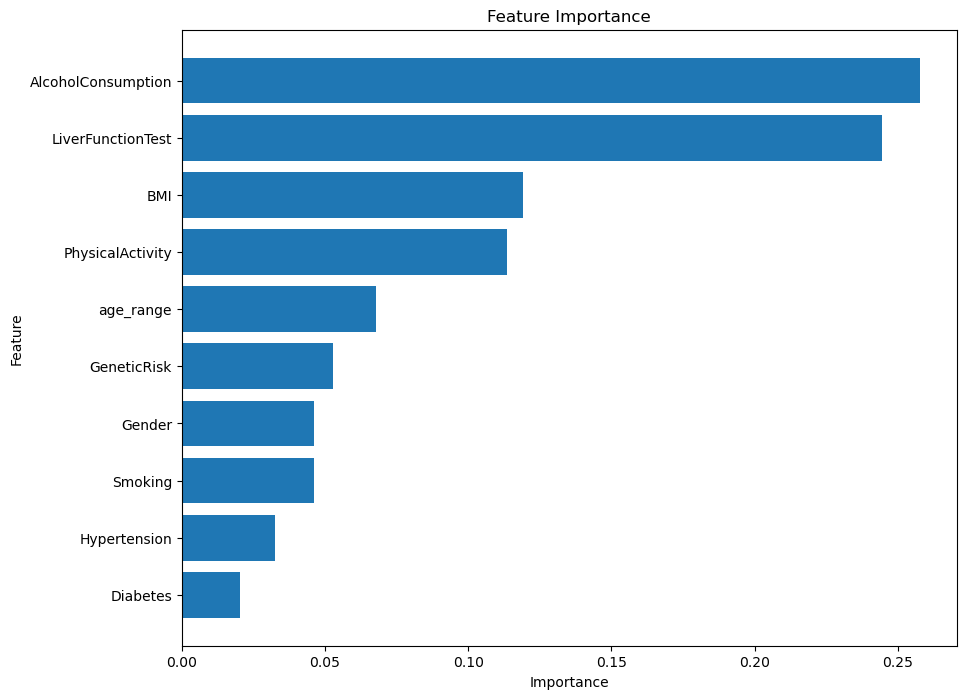

In [73]:
# Get Feature Importances
importances = rfc.feature_importances_
feature_names = X.columns  

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


We can see that the top three most important features are Alcohol comsumption, liver function test, and body mass index. With the horizontal plot, we can visually see the representation of the importance score with the longer bars indicating higher importance.

## Save the Model

In [74]:
import joblib
joblib.dump(rfc, 'liver_prediction_model.pkl')

# Save the Scaler and label
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

The model is saved using the joblib.dump

## Conclusion